# Polynomial Regression

In [1]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# reshape the X so it is a 2D array, which sklearn model usually expect
X = iris['data'][:,0].reshape(-1, 1) # 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
y = iris['data'][:,3] # petal width (cm)
X.shape

(150, 1)

In [4]:
# Import the PolynomialFeatures from sklearn to change the data
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_.shape

(150, 3)

In [6]:
X[0], X_[0]

(array([5.1]), array([ 1.  ,  5.1 , 26.01]))

In [7]:
# import regression from sklearn
from sklearn.linear_model import LinearRegression
# fit/train the model using the data
reg = LinearRegression()
reg.fit(X_, y)

LinearRegression()

In [8]:
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹") # used to create subscript so it's pretty
print('score (r square):', reg.score(X_, y))
print('coef:', reg.coef_)
print('intercept:', reg.intercept_)
print('equation: y = ' + ' + '.join([f'{reg.coef_[i]:.2f}x{str(i).translate(SUP)}' for i in range(len(reg.coef_))]) + f' + {reg.intercept_:.2f}')

score (r square): 0.700599606382408
coef: [ 0.          2.80601494 -0.17189424]
intercept: -9.210815856143169
equation: y = 0.00x⁰ + 2.81x¹ + -0.17x² + -9.21


In [9]:
plt_x = np.linspace(X[:,0].min(), X[:,0].max(), 300).reshape(-1,1)
plt_x_squared= poly.fit_transform(plt_x)
y_pred = reg.predict(plt_x_squared)

In [10]:
y_equa = np.array([reg.coef_[i] * (plt_x[:, 0]**i) for i in range(len(reg.coef_))]).sum(0) + reg.intercept_

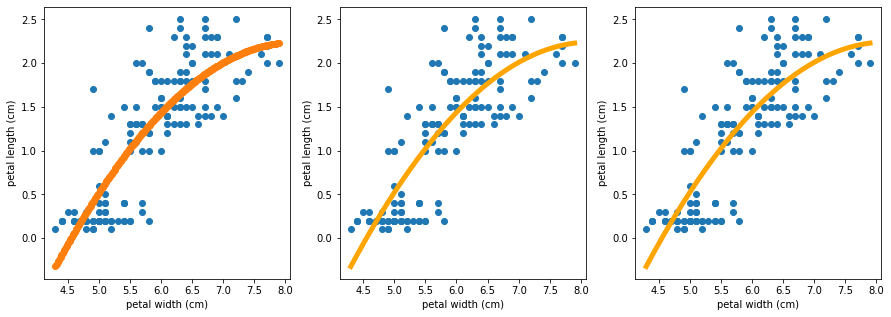

In [11]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axs[i].scatter(X, y)
    axs[i].set_xlabel(iris['feature_names'][3])
    axs[i].set_ylabel(iris['feature_names'][2])
axs[0].scatter(plt_x, y_pred)
axs[1].plot(plt_x, y_pred, color='orange', linewidth=5)
axs[2].plot(plt_x, y_equa, color='orange', linewidth=5)

## Cubic?

In [12]:
poly3 = PolynomialFeatures(degree=3)
X_3 = poly3.fit_transform(X)
X_3.shape

(150, 4)

In [13]:
reg.fit(X_3, y)

LinearRegression()

In [14]:
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹") # used to create subscript so it's pretty
print('score (r square):', reg.score(X_3, y))
print('coef:', reg.coef_)
print('intercept:', reg.intercept_)
print('equation: y = ' + ' + '.join([f'{reg.coef_[i]:.2f}x{str(i).translate(SUP)}' for i in range(len(reg.coef_))]) + f' + {reg.intercept_:.2f}')

score (r square): 0.7157064239375199
coef: [  0.         -10.67156954   2.08179174  -0.12376391]
intercept: 17.24964842680484
equation: y = 0.00x⁰ + -10.67x¹ + 2.08x² + -0.12x³ + 17.25


In [15]:
plt_x = np.linspace(X[:,0].min(), X[:,0].max(), 300).reshape(-1,1)
plt_x_squared= poly3.fit_transform(plt_x)
y_pred = reg.predict(plt_x_squared)
y_equa = np.array([reg.coef_[i] * (plt_x[:, 0]**i) for i in range(len(reg.coef_))]).sum(0) + reg.intercept_

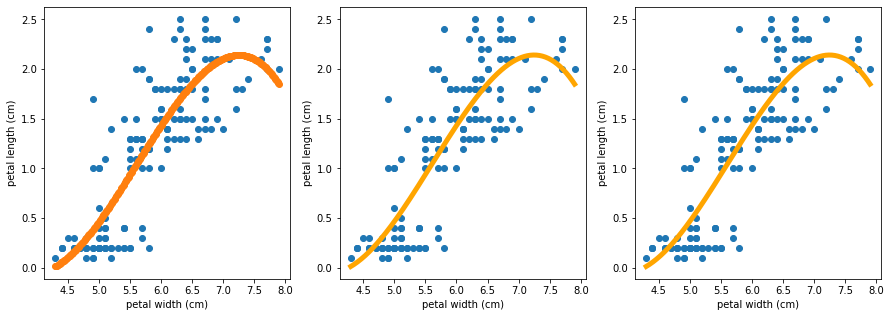

In [16]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axs[i].scatter(X, y)
    axs[i].set_xlabel(iris['feature_names'][3])
    axs[i].set_ylabel(iris['feature_names'][2])
axs[0].scatter(plt_x, y_pred)
axs[1].plot(plt_x, y_pred, color='orange', linewidth=5)
axs[2].plot(plt_x, y_equa, color='orange', linewidth=5)